<a href="https://colab.research.google.com/github/VineetKiragi/CMPE-257/blob/main/CMPE_257_Question_Answering_Task_Rahul_NLP_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Make sure you have a GPU running
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## EXPLORATORY DATA ANALYSIS

In [3]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split

In [4]:
null = "null"
false=False
true = True

with open("/content/drive/MyDrive/merged_file.json", encoding='UTF-8') as f:
    a= json.load(f)

In [5]:
a

{'data': [{'paragraphs': [{'qas': [{'question': 'In which state is Los Angeles?',
       'id': 597553,
       'answers': [{'answer_id': 647225,
         'document_id': 1202512,
         'question_id': 597553,
         'text': 'California',
         'answer_start': 36,
         'answer_end': 46,
         'answer_category': None}],
       'is_impossible': False},
      {'question': 'What more can be told about the city?',
       'id': 597555,
       'answers': [{'answer_id': 647227,
         'document_id': 1202512,
         'question_id': 597555,
         'text': 'TCL Chinese Theatre displays celebrities’ hand- and footprints, the Walk of Fame honors thousands of luminaries and vendors sell maps to stars’ homes',
         'answer_start': 266,
         'answer_end': 415,
         'answer_category': None}],
       'is_impossible': False},
      {'question': 'What are some iconic thing about the city?',
       'id': 597559,
       'answers': [{'answer_id': 647232,
         'document_id': 12

In [6]:
p = []
q=[]
ans = []
astart = []
aend= []
for i in a["data"]:
    for j in i["paragraphs"][0]["qas"]:
        #print(j)
        if(len(j["answers"])!=0):
          astart.append(j["answers"][0]["answer_start"])

          p.append(i["paragraphs"][0]["context"])
          q.append(j["question"])
          
          ans.append(j["answers"][0]["text"])
          aend.append(j["answers"][0]["answer_end"])
        
df = pd.DataFrame()
df["context"] = p
df["questions"] = q
df["answer"] = ans
df["answer_start"] = astart
df["answer_end"] = aend


In [7]:
df


,context,questions,answer,answer_start,answer_end
0,Los Angeles is a sprawling Southern California...,In which state is Los Angeles?,California,36,46
1,Los Angeles is a sprawling Southern California...,What more can be told about the city?,TCL Chinese Theatre displays celebrities’ hand...,266,415
2,Los Angeles is a sprawling Southern California...,What are some iconic thing about the city?,"Paramount Pictures, Universal and Warner Brothers",161,210
3,New York City comprises 5 boroughs sitting whe...,What are some iconic thing about the city?,Empire State Building and sprawling Central Park,269,318
4,New York City comprises 5 boroughs sitting whe...,What could be said the geography of the city?,comprises 5 boroughs sitting where the Hudson ...,14,90
...,...,...,...,...,...
495,"Oxnard is a seaside city west of Los Angeles, ...",What are the popular landmarks in this city?,Its central Carnegie Art Museum displays conte...,61,211
496,"Oxnard is a seaside city west of Los Angeles, ...",What is this city known for?,"On the Pacific Coast, Oxnard Beach Park has a ...",213,412
497,Columbus is a city in western Georgia. The Cha...,Where is the city located?,Columbus is a city in western Georgia,0,37
498,Columbus is a city in western Georgia. The Cha...,What are the popular landmarks in this city?,The Chattahoochee Riverwalk is a long promenad...,39,138


## VISUALIZATION

In [8]:
from itertools import chain
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [9]:
allwords = " ".join(df["answer"])

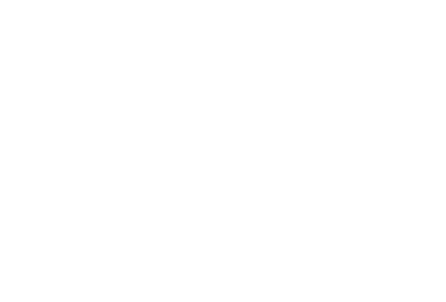

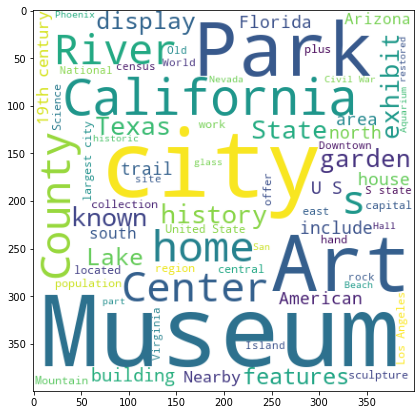

In [10]:
wordcloud = WordCloud(width = 400, height = 400, 
                    background_color ='white', 
                    stopwords = set(STOPWORDS), 
                    min_font_size = 10).generate(allwords)

plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 

plt.show()

In [11]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df["questions"])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
vec_df = pd.DataFrame(denselist, columns=feature_names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
vec_df

,about,also,ana,anaheim,anchorage,and,angeles,any,anything,architecture,...,toledo,usa,vegas,we,what,when,where,which,wichita,you
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.625104,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.276536,0.0,0.0
1,0.252454,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.128109,0.0,0.000000,0.000000,0.0,0.0
2,0.415825,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.211012,0.0,0.000000,0.000000,0.0,0.0
3,0.415825,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.211012,0.0,0.000000,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.147409,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.213093,0.0,0.000000,0.000000,0.0,0.0
496,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.294355,0.0,0.000000,0.000000,0.0,0.0
497,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.628354,0.000000,0.0,0.0
498,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.213093,0.0,0.000000,0.000000,0.0,0.0
